# Final Project

## Names: SOPHIA, CAM

- Insert Markdown chunks for your written responses as needed
- Do not include unnecessary code. Only code that is needed to answer the questions should be included, nothing more. 
- Be sure your work is **reproducible** by "Restart and Clear Output" then "Run All" cells
- The group leader will make a single submission on Moodle on behalf of the group. 
- **ACKNOWELDGE ALL EXTERNAL SOURCES HERE:** Give a brief summary of any external sources you used. Ex:
    - Google AI overview for XXX
    - StackOverflow for YYY

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

# We will turn of the future warnings that xgboost gives us
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. The Data

The dataset we chose is [LLM - Detect AI Generated Text](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview) where:

* Outcome variable: Binary categorical AI generated or not
* Predictor variables: -- created in feature engineering, must be edited
* Number of observations:
    * Training set: $n_{train} = 27770$
    * Test set: $n_{test} = 9000$
* Score/metric used for the [leaderboard](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/leaderboard): Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [9]:
# Load all datasets here. 
train = pd.read_csv("data/train_essays_complete.csv", sep=',', index_col = 'essay_id')
# Kaggle really should've named this field sex_submission.csv
#example_submission = pd.read_csv("data/gender_submission.csv", sep=',', index_col = 'PassengerId')

# Note we set the PassengerId identification variable as the index of each 
# row by setting index_col = 'PassengerId'. That way PassengerId isn't an
# an actual column of data, but rather metadata about each row.
train.head()

## Train/test split
train_essay, test_essay = train_test_split(train, test_size=0.3, random_state=8)

## Separate outcome
train_essay_y = (train_essay['generated'])
train_essay_X = train_essay['text']

## Print some examples of AI gen
print(train_essay_y.head())
print("\n")
print(train_essay_X[train_essay_y ==1].sample(10))

essay_id
19119    1
22536    0
23665    0
24796    0
8296     1
Name: generated, dtype: int64


essay_id
9067     Career Commitment\n\nThe pursuit of a successf...
13012    Technology has become an increasingly integral...
11529    Sure, here's my attempt at writing an essay as...
18954    In recent years, there has been a growing move...
13714    career choice for you and what steps you plan ...
6053     Taking your own path and self-teaching are imp...
2654     I think the minimum wage should be raise in my...
4173     There is merit to both teacher-designed and st...
17229    Dear Senator,\n\nI am writing to you on a crit...
8698     After school homework clubs have become increa...
Name: text, dtype: object


## 2. Exploratory Data Analysis

Perform all necessary EDA here. Before submitting, only keep those you feel are relevant

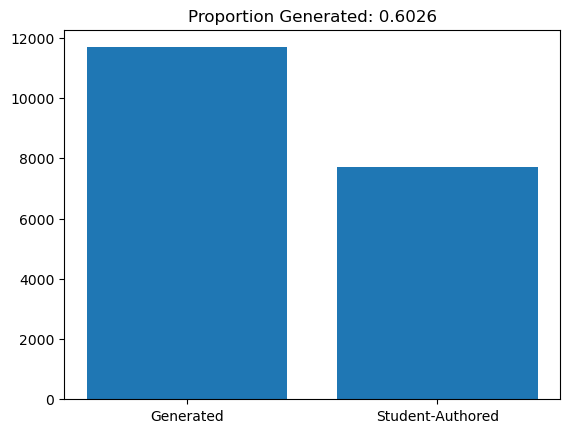

In [8]:
# Univariate visualization of outcome variable:
y_train_cat = train_essay_y.map({1: 'Generated', 0: 'Student-Authored'})
category_counts = pd.Series(y_train_cat).value_counts()
plt.bar(x = category_counts.index, height = category_counts.values)
prop_gen = train_essay_y.mean()
plt.title("Proportion Generated: " + str(f"{prop_gen:.4f}"))
plt.show()

## 3. Feature Engineering

Perform your feature engineering here and then create `y_train`, `X_train` and `X_test`. 

In [ ]:


# Create outcome/predictor variables for train & test
y_train = train['Survived']
X_train = train.drop(['Survived'], axis="columns")
X_test = test

## 4. Data preparation pipelines and pre-processing

Run all preparation and pre-processing pipelines here

## 5. Model selection and hyperparameter tuning

Perform all model selection and hyperpareter tuning here. Create separate pipelines here

## 6. Creation of final pipeline

Create your final pipeline here and save it in an object called `pipe_final`. 

## 7. Creating Submission

* Using `pipe_final`, create a data frame `final_submission` that has your predictions and write to `final_submission.csv` that you can submit on Kaggle. Note the format of `final_submission.csv` has to match that `example_submission.csv` exactly.
* Take a screen shot of your final leaderboard score and ensure it displays below
* Run the `RepeatedKFold()` as you did in PS3. 


* Keep track of at least one score a day

In [15]:
# Apply pipe_final to create final_submission data frame here:


# Write to CSV. Note setting index=True will output the row indices `PassengerId`
# as the first column of the CSV
final_submission.to_csv('data/final_submission.csv', index=True)

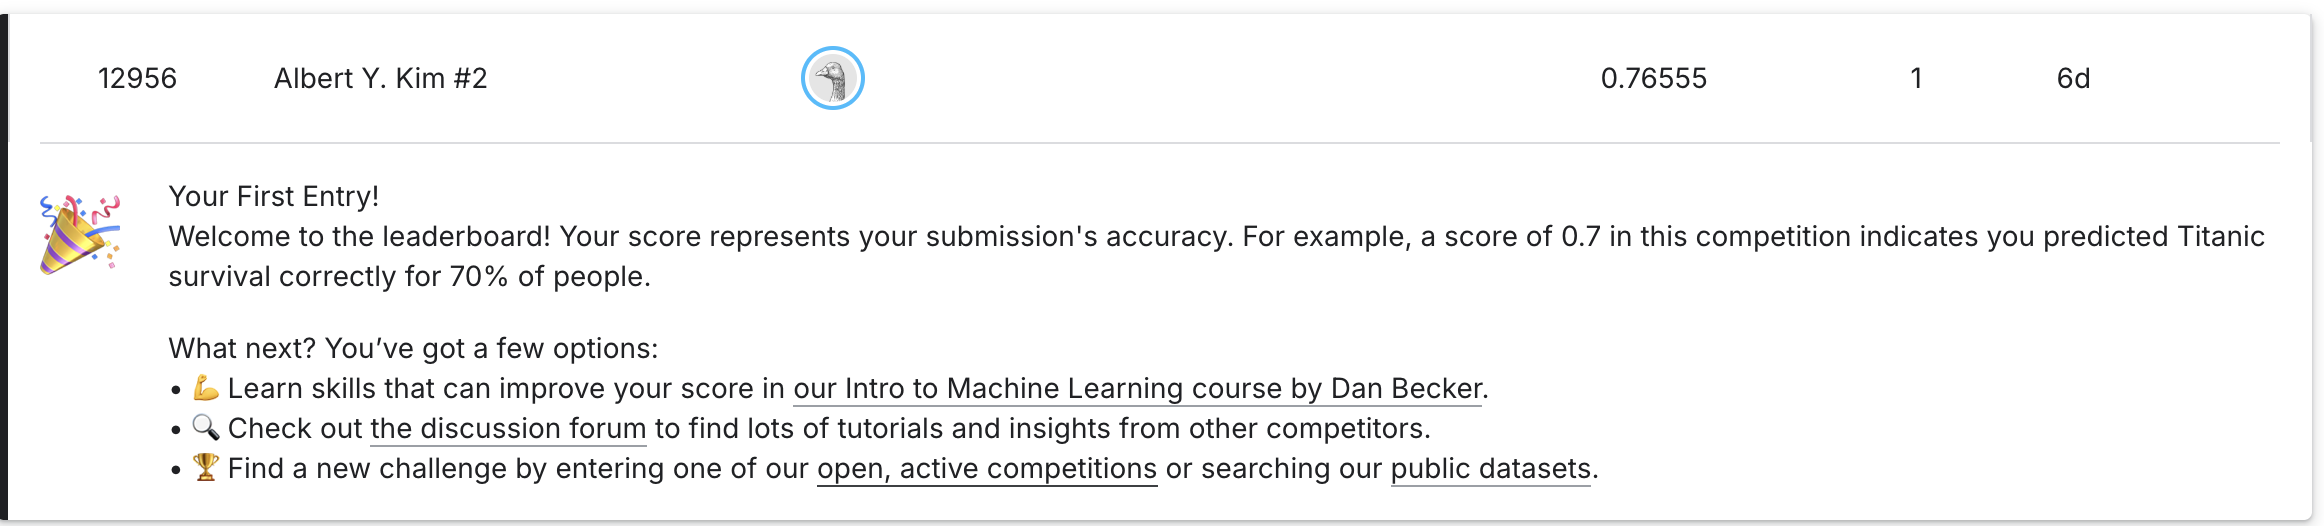

In [2]:
from IPython.display import Image
Image("images/leaderboard.png")

In [ ]:
cv_final = RepeatedKFold(n_splits=5, n_repeats=10, random_state=500)
scores_final = cross_val_score(pipe_final, X_train, y_train, scoring='accuracy', cv=cv_final)
print(f'Mean accuracy: {np.mean(scores_final):.3f}')

## 8. Appendix

Please anything extra that you don't feel is central, but would still like to keep here